In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

In [3]:
df1 = pd.read_csv("../../../data/WellProduction.csv",parse_dates=['ProdPeriod'],index_col=False)
df1 = df1.drop(columns=['WellHeader.Match'])

In [4]:
df1.sample(10)

,EPAssetsId,ProdPeriod,ProdType,Volume
587897,1164793,2018-01-31,Oil Production (Bbls),1252.299180
356905,2599197,2017-11-30,Water Production (Bbls),387.451680
135621,41418,2017-07-31,Condensate Production (Bbls),20590.289280
374974,2607999,2018-04-30,Water Production (Bbls),14521.261260
27567,2609625,2019-07-31,Production Hours,744.000000
629676,1150955,2016-11-30,Oil Production (Bbls),161.647860
623354,1160980,2017-02-28,Oil Production (Bbls),266.687520
254680,41383,2019-09-30,Production Hours,717.600000
156187,43058,2019-07-31,Condensate Production (Bbls),1.886940
860183,1150374,2016-06-30,Gas Production (MMcf),2.080042


In [5]:
df1['ProdPeriod']

0        2019-12-31
1        2019-12-31
2        2019-12-31
3        2019-12-31
4        2019-12-31
            ...    
961049   2019-11-30
961050   2019-11-30
961051   2019-11-30
961052   2019-11-30
961053   2019-11-30
Name: ProdPeriod, Length: 961054, dtype: datetime64[ns]

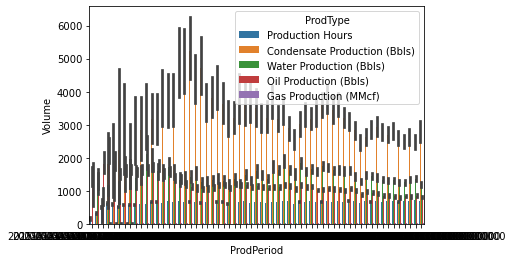

In [6]:
sns.barplot(x='ProdPeriod',y='Volume',hue='ProdType',data=df1)

In [14]:
well_id = [2583383, 2607434, 1170339, 2579261, 2582203, 1151694, 2581801,
       2605638, 1168104, 2591839]
def single_Well_plot1(well_id):
    df1
    df_well = df1[(df1['EPAssetsId'].isin(well_id)) & (df1['ProdType'] != 'Production Hours')]
    chart= alt.Chart(df_well).mark_bar(size=5).encode(
        x=alt.X('ProdPeriod',timeUnit='yearmonthdate'),
        y='Volume',
        color='ProdType',
         facet=alt.Facet('EPAssetsId', columns=3)
        ).properties(title='Wells',
    width=180,
    height=150
    ).interactive()
    return display(chart)
    


In [15]:
single_Well_plot1(well_id)

alt.Chart(...)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  object        
 3   Volume      961054 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 29.3+ MB


## Create data frame for each Type of production monthly

In [17]:
df_well = df1[(df1['EPAssetsId'].isin(well_id)) & (df1['ProdType'] != 'Production Hours')]

In [ ]:
## Group the Volume per Prod Type for each month in the data seet and fill with 0 for NaNa
df3=df1.groupby(['EPAssetsId','ProdPeriod','ProdType']).sum().unstack('ProdType')
df3.fillna(value=0,inplace = True) #Will fill NaNa to the very end so the mean it is calculated correctly
df3.head()

In [ ]:
well_id = 43073
def single_Well_plot(well_id):
    df3.reset_index(level=0, inplace=True)
    df_well = df3[df3['EPAssetsId']== well_id]
    df_well.columns = df_well.columns.droplevel()
    df_well=df_well.drop(columns=['','Production Hours'])
    return df_well.plot()
single_Well_plot(well_id)

In [18]:
## Group the Volume per Prod Type for each month in the data seet and fill with 0 for NaNa
df2=df1.groupby(['EPAssetsId','ProdPeriod','ProdType']).sum().unstack('ProdPeriod')
#df2.fillna(value=0,inplace = True) Will fill NaNa to the very end so the mean it is calculated correctly

In [19]:
df2.head()

Volume                        \
ProdPeriod                              2015-01-31 2015-02-28 2015-03-31   
EPAssetsId ProdType                                                        
3373       Condensate Production (Bbls)        NaN        NaN        NaN   
           Gas Production (MMcf)               NaN        NaN        NaN   
           Production Hours                    NaN        NaN        NaN   
           Water Production (Bbls)             NaN        NaN        NaN   
6976       Condensate Production (Bbls)        NaN        NaN        NaN   

                                                                          \
ProdPeriod                              2015-04-30 2015-05-31 2015-06-30   
EPAssetsId ProdType                                                        
3373       Condensate Production (Bbls)        NaN        NaN        NaN   
           Gas Production (MMcf)               NaN        NaN        NaN   
           Production Hours                    NaN        NaN        NaN   
           Water Production (Bbls)             NaN        NaN        NaN   
6976       Condensate Production (Bbls)        NaN        NaN        NaN   

                                                                          \
ProdPeriod                              2015-07-31 2015-08-31 2015-09-30   
EPAssetsId ProdType                                                        
3373       Condensate Production (Bbls)        NaN        NaN        NaN   
           Gas Production (MMcf)               NaN        NaN        NaN   
           Production Hours                    NaN        NaN        NaN   
           Water Production (Bbls)             NaN        NaN        NaN   
6976       Condensate Production (Bbls)        NaN        NaN        NaN   

                                                    ...              \
ProdPeriod                              2015-10-31  ...  2019-04-30   
EPAssetsId ProdType                                 ...               
3373       Condensate Production (Bbls)        NaN  ...  747.857220   
           Gas Production (MMcf)               NaN  ...   58.562533   
           Production Hours                    NaN  ...  708.000000   
           Water Production (Bbls)             NaN  ...  300.652440   
6976       Condensate Production (Bbls)        NaN  ...    6.918780   

                                                                             \
ProdPeriod                               2019-05-31  2019-06-30  2019-07-31   
EPAssetsId ProdType                                                           
3373       Condensate Production (Bbls)  815.158080  820.189920  1040.96190   
           Gas Production (MMcf)          58.308266   40.989888    40.54139   
           Production Hours              703.200000  712.800000   700.80000   
           Water Production (Bbls)       335.246340  275.493240   343.42308   
6976       Condensate Production (Bbls)    5.660820    3.773880     3.77388   

                                                                             \
ProdPeriod                               2019-08-31  2019-09-30  2019-10-31   
EPAssetsId ProdType                                                           
3373       Condensate Production (Bbls)  903.844260  483.056640  560.421180   
           Gas Production (MMcf)          38.765056   43.242973   43.257099   
           Production Hours              638.400000  626.400000  734.400000   
           Water Production (Bbls)       221.400960  214.482180  250.334040   
6976       Condensate Production (Bbls)    3.773880    3.144900    3.144900   

                                                                            
ProdPeriod                               2019-11-30  2019-12-31 2020-01-31  
EPAssetsId ProdType                                                         
3373       Condensate Production (Bbls)  352.857780  249.705060        NaN  
           Gas Production (MMcf)          39.436037   41.141742        NaN

In [20]:
#Reset index so the prodType is now a column
df3 = df2.reset_index('ProdType')

In [21]:
# identify the prodType values
prod_type=df3['ProdType'].unique()
prod_type

array(['Condensate Production (Bbls)', 'Gas Production (MMcf)',
       'Production Hours', 'Water Production (Bbls)',
       'Oil Production (Bbls)'], dtype=object)

In [22]:

def create_labels(prodtype,df):
    """ Create new labels for columns with the type of produciton and date"""
    months =['January','February','March','April','May','June','July','August','September','October','November','December']
    years = ['2015','2016','2017','2018','2019','2020']
    n =len(df.columns)
    labels =[]

    while n > 0:
        for year in years:
                for month in months:
                    if n >0:
                        labels.append(prodtype+" "+ month+" " + year)
                        n = n-1
    df.columns=labels                
    return df

In [23]:
# create a dataframe list with a dataframe for each prodType
dfs=[]
for product in prod_type:
    #filter by type
    df = df3[df3['ProdType']== product]
    #change from multindex columns to a single index
    df.columns = df.columns.droplevel()
    df = df.drop(columns="")
    df =create_labels(product, df)
    #calcualte total volume and monthly volume.
    total = df.sum(axis=1,skipna=True)
    mean = df.mean(axis=1,skipna=True)
    df[product+' Total'] = total
    df[product + ' Average'] = mean
    dfs.append(df.reset_index())


In [24]:
#checking number of wells in dataframes
for df in dfs:
    print(df.shape)

(2924, 64)
(10374, 64)
(10196, 64)
(7254, 64)
(6978, 64)


Just 176 wells have condensate production, and 727 water production

In [25]:
#assing dataframe names
gas_production = dfs[0]
oil_production = dfs[1]
time_production = dfs[2]
water_production = dfs[3]
condensate_production = dfs[4]

In [26]:
#check the dataframe
gas_production.sample(10)

,EPAssetsId,Condensate Production (Bbls) January 2015,Condensate Production (Bbls) February 2015,Condensate Production (Bbls) March 2015,Condensate Production (Bbls) April 2015,Condensate Production (Bbls) May 2015,Condensate Production (Bbls) June 2015,Condensate Production (Bbls) July 2015,Condensate Production (Bbls) August 2015,Condensate Production (Bbls) September 2015,...,Condensate Production (Bbls) June 2019,Condensate Production (Bbls) July 2019,Condensate Production (Bbls) August 2019,Condensate Production (Bbls) September 2019,Condensate Production (Bbls) October 2019,Condensate Production (Bbls) November 2019,Condensate Production (Bbls) December 2019,Condensate Production (Bbls) January 2020,Condensate Production (Bbls) Total,Condensate Production (Bbls) Average
1846,2595458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.97274,16.746592
654,41253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4166.99250,18683.85090,28598.46264,15471.02106,13495.39488,10581.33054,9852.97170,NaN,100850.02422,14407.146317
456,40528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.42956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.42956,265.429560
425,40395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3641.16522,4548.78336,4695.33570,3644.93910,4283.35380,4669.54752,2759.96424,NaN,175184.13858,6488.301429
857,41716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.12736,20.127360
1842,2595452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1388.78784,462.929280
2536,2612295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.99028,29.247570
476,40615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,830.88258,783.08010,549.72852,700.05474,682.44330,584.32242,652.25226,NaN,75065.61810,2780.208078
1862,2595520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2686.37358,335.796697
2809,2618674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.62898,1.25796,NaN,NaN,0.62898,0.62898,22.01430,4.402860


## Join dataframes 

In [27]:
join1=pd.merge(gas_production, water_production, on='EPAssetsId', how='outer').fillna(0)

In [28]:
join2=pd.merge(join1,oil_production, on='EPAssetsId', how='outer').fillna(0)
join3=pd.merge(join2,time_production, on ='EPAssetsId', how='outer').fillna(0)
final_df=pd.merge(join3,condensate_production, on ='EPAssetsId', how='outer').fillna(0)

In [29]:
final_df.sample(10)

,EPAssetsId,Condensate Production (Bbls) January 2015,Condensate Production (Bbls) February 2015,Condensate Production (Bbls) March 2015,Condensate Production (Bbls) April 2015,Condensate Production (Bbls) May 2015,Condensate Production (Bbls) June 2015,Condensate Production (Bbls) July 2015,Condensate Production (Bbls) August 2015,Condensate Production (Bbls) September 2015,...,Oil Production (Bbls) June 2019,Oil Production (Bbls) July 2019,Oil Production (Bbls) August 2019,Oil Production (Bbls) September 2019,Oil Production (Bbls) October 2019,Oil Production (Bbls) November 2019,Oil Production (Bbls) December 2019,Oil Production (Bbls) January 2020,Oil Production (Bbls) Total,Oil Production (Bbls) Average
2367,2607801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
2688,2615882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
1865,2595547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
3678,1151510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.83108,144.66540,150.32622,154.72908,145.29438,147.81030,166.05072,147.18132,34502.69790,663.513421
3659,1151467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99.37884,91.20210,81.13842,119.50620,126.42498,103.15272,154.72908,178.00134,30903.04536,583.076328
7997,2621297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,5543.82972,22243.24872,13876.55676,14828.20350,13030.57866,12282.09246,81804.50982,13634.084970
5254,1167040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,154.10010,42.14166,96.23394,138.37560,147.18132,121.39314,74.21964,52.20534,6786.69420,261.026700
3010,39275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
5328,1167829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178.63032,143.40744,153.47112,123.90906,86.79924,118.87722,88.68618,52.83432,8440.91160,351.704650
2156,2602797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000


In [30]:
final_df[(final_df['Condensate Production (Bbls) Total']==0)&(final_df['Oil Production (Bbls) Total']==0)&(final_df['Gas Production (MMcf) Total']==0)]

,EPAssetsId,Condensate Production (Bbls) January 2015,Condensate Production (Bbls) February 2015,Condensate Production (Bbls) March 2015,Condensate Production (Bbls) April 2015,Condensate Production (Bbls) May 2015,Condensate Production (Bbls) June 2015,Condensate Production (Bbls) July 2015,Condensate Production (Bbls) August 2015,Condensate Production (Bbls) September 2015,...,Oil Production (Bbls) June 2019,Oil Production (Bbls) July 2019,Oil Production (Bbls) August 2019,Oil Production (Bbls) September 2019,Oil Production (Bbls) October 2019,Oil Production (Bbls) November 2019,Oil Production (Bbls) December 2019,Oil Production (Bbls) January 2020,Oil Production (Bbls) Total,Oil Production (Bbls) Average
3285,43073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3286,43074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
final_df.shape

(10386, 316)

In [36]:
df_hist_average=final_df[['EPAssetsId','Condensate Production (Bbls) Average', 'Gas Production (MMcf) Average',
       'Production Hours Average', 'Water Production (Bbls) Average',
       'Oil Production (Bbls) Average']]

In [37]:
df_hist_total=final_df[['EPAssetsId','Condensate Production (Bbls) Total', 'Gas Production (MMcf) Total',
       'Production Hours Total', 'Water Production (Bbls) Total',
       'Oil Production (Bbls) Total']]

In [38]:
df_hist_average

,EPAssetsId,Condensate Production (Bbls) Average,Gas Production (MMcf) Average,Production Hours Average,Water Production (Bbls) Average,Oil Production (Bbls) Average
0,3373,1747.261513,56.115461,601.737931,880.077801,0.00000
1,6976,99.038143,28.309374,649.600000,834.158518,0.00000
2,6977,103.717518,56.482131,632.277551,594.784026,0.00000
3,7129,38.787100,58.840424,604.717241,834.678149,0.00000
4,7130,41.198190,82.397403,661.161290,685.304145,0.00000
...,...,...,...,...,...,...
10381,2624624,0.000000,11.297205,262.000000,0.000000,6781.03338
10382,2625202,0.000000,43.608481,0.000000,0.000000,7159.36485
10383,2625908,0.000000,0.017657,148.000000,0.000000,1430.30052
10384,1165208,0.000000,0.000000,48.000000,0.000000,5.66082


In [10]:
#safe file
final_df.to_csv('production1.csv',index=False)

NameError: name 'final_df' is not defined

# Plots

In [20]:
df1.head()

,EPAssetsId,ProdPeriod,ProdType,Volume
0,1159612,2019-12-31,Production Hours,744.0
1,1166272,2019-12-31,Production Hours,744.0
2,1172352,2019-12-31,Production Hours,744.0
3,1152904,2019-12-31,Production Hours,744.0
4,1160926,2019-12-31,Production Hours,744.0


In [21]:
df1['ProdType']=df1['ProdType']
df1['Volume']=df1['Volume'].astype('int')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961054 entries, 0 to 961053
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   EPAssetsId  961054 non-null  int64         
 1   ProdPeriod  961054 non-null  datetime64[ns]
 2   ProdType    961054 non-null  object        
 3   Volume      961054 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 29.3+ MB


In [53]:
alt.Chart(df1.sample(10)).mark_area(size=1).encode(
    x='ProdPeriod',
    y='Volume',
    color='ProdType')

alt.Chart(...)

In [51]:
alt.Chart(final_df).mark_bar().encode(
    y='count()',
    x ='Gas Production (MMcf) Total')

NameError: name 'final_df' is not defined